In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import statistics
from scipy import stats
from scipy.stats import norm, kurtosis
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:\\Users\\User\\Downloads\\ms-data1 (2).xlsx', sheet_name = '2')

In [3]:
df.head()

,one,two,three,four,five,six,seven
0,-16.427992,10.337568,10.094972,12.235925,10,16,-2.336080
1,-29.368694,20.601542,15.573639,12.159321,6,15,5.041232
2,-6.561724,1.876631,2.625150,24.552468,10,14,6.987623
3,7.358867,17.243398,15.855155,12.348476,9,14,9.542421
4,6.692038,-23.179041,11.742064,19.597243,9,15,11.116361


## Проведём предварительный анализ, включающий:
* оценку числовых характеристик (по 2 в каждой из групп; оформить в виде таблицы);
* графический анализ;
* предварительное заключение о законе распределения каждой случайной величины;

In [4]:
df.describe()

,one,two,three,four,five,six,seven
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-10.356208,8.813767,8.815445,12.626233,8.392000,12.114000,7.921503
std,13.584549,18.327286,13.410601,6.991504,1.627154,3.368635,3.833575
min,-33.870846,-49.504520,-28.674916,-7.461513,3.000000,3.000000,-5.948884
25%,-22.278191,-3.051858,-0.717933,7.874639,7.000000,10.000000,5.430496
50%,-9.587024,8.710024,8.947190,12.756511,8.000000,12.000000,7.737115
75%,1.684851,20.505862,18.168010,17.091330,10.000000,14.000000,10.567242
max,11.894711,62.953554,51.361200,35.343018,12.000000,26.000000,20.426754


In [5]:
specifications = df.describe().loc[['mean','std','50%'],:]
scope_variation = df.max() - df.min()
scope_variation

one       45.765557
two      112.458074
three     80.036116
four      42.804531
five       9.000000
six       23.000000
seven     26.375637
dtype: float64

In [6]:
for unique in specifications:
    # Посчитаем дисперсию
    specifications.loc['variance', unique] = df[unique].var()
    # Размах вариации
    specifications.loc['scope_variation', unique] = scope_variation[unique]
    # Коэффициент эксцесса
    specifications.loc['kurtosis', unique] =  scipy.stats.kurtosis(df[unique], fisher = True)
    # Моду
    specifications.loc['mode', unique] =  df[unique].value_counts(ascending = False).head(1).index[0]
    # Коэффициент асимметрии
    specifications.loc['skewness', unique] = (specifications.loc['mean', unique] 
                                              - specifications.loc['mode', unique]) / specifications.loc['std', unique]

    
specifications

,one,two,three,four,five,six,seven
mean,-10.356208,8.813767,8.815445,12.626233,8.392000,12.114000,7.921503
std,13.584549,18.327286,13.410601,6.991504,1.627154,3.368635,3.833575
50%,-9.587024,8.710024,8.947190,12.756511,8.000000,12.000000,7.737115
variance,184.539975,335.889412,179.844218,48.881130,2.647631,11.347699,14.696298
scope_variation,45.765557,112.458074,80.036116,42.804531,9.000000,23.000000,26.375637
kurtosis,-1.246367,0.287275,-0.229775,0.027581,-0.343639,0.354309,0.301399
mode,-18.815943,-23.627036,8.427380,21.798782,9.000000,12.000000,7.971697
skewness,0.622747,1.770082,0.028937,-1.311957,-0.373658,0.033842,-0.013093


In [7]:
df.columns

Index(['one', 'two', 'three', 'four', 'five', 'six', 'seven'], dtype='object')

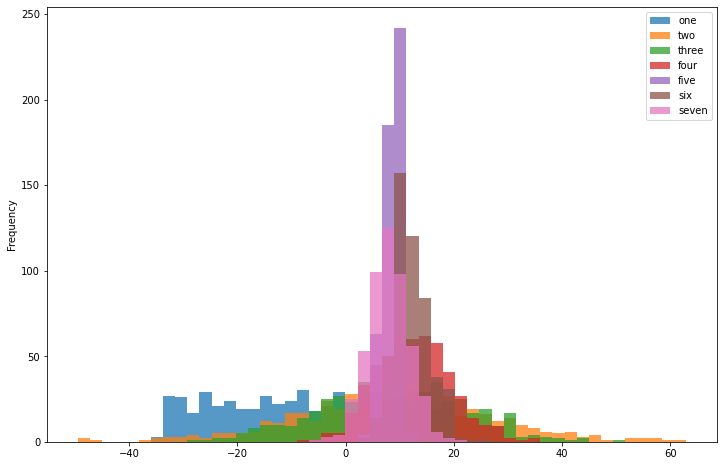

In [8]:
df.plot(kind = 'hist', figsize = (12, 8), bins = 50, alpha = 0.75);

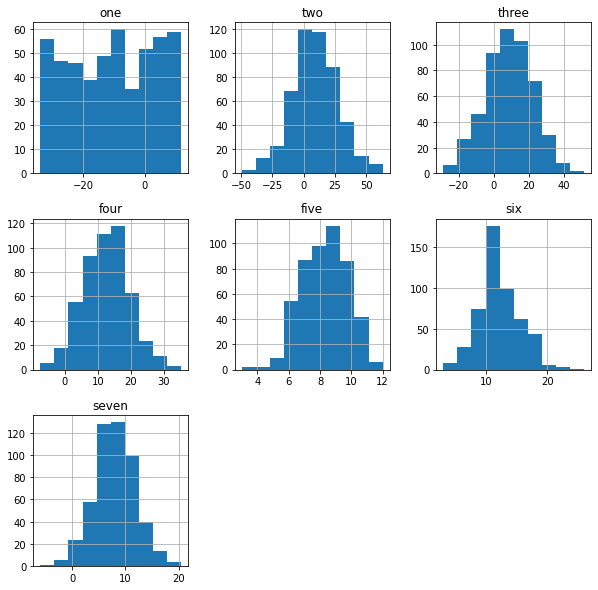

In [9]:
df.hist(figsize = (10,10));

Все гистограммы кроме гистограммы первой выборки, её мы назовём условно равномерной, могли бы подходить под описание нормального распределения в силу унимодальности, отсутствия выбросов и колокообразной формы распределения.

 ### Провести проверку на выбросы. В случае выброса – повторить п.1, дополнить таблицу. 

In [10]:
columns_name = list(df.columns)

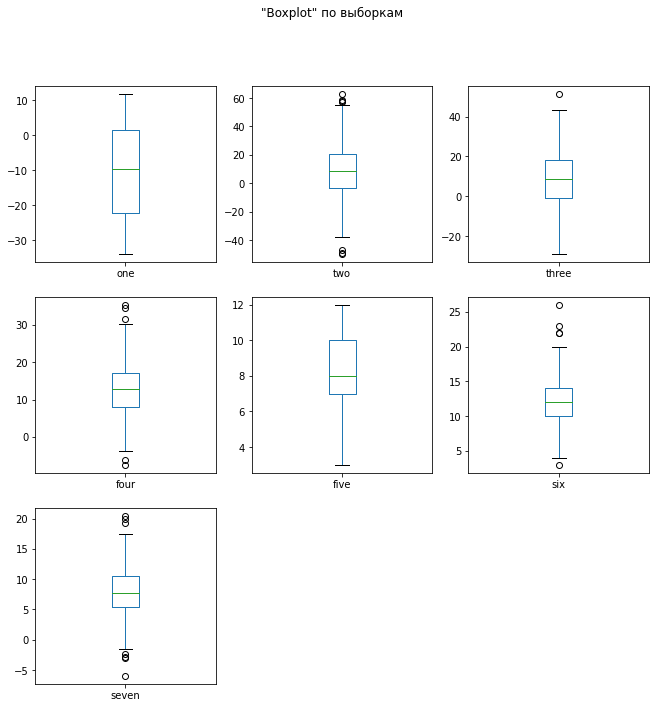

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i in range(len(columns_name)):
    plt.subplot(3, 3, i+1)
    df.loc[:, columns_name[i]].plot( kind ='box' , figsize = (11,11));
fig.suptitle('"Boxplot" по выборкам');

Уберём все значения, выходящие за 1.5 межквартильных размаха:

In [12]:
def scope_quartile (data,atribut):
    per_cent_75 = data[atribut].describe()['75%']
    per_cent_25 = data[atribut].describe()['25%']
    return (per_cent_75 - per_cent_25)*3/2

In [13]:
def delete(data,atribut):
    plt.subplot(1, 2, 1)
    data[atribut].plot(figsize = (12,6), kind = 'box', grid = True, title ="Boxplot '{}' распределения до преобразований".format(atribut));
    per_cent_75 = data[atribut].describe()['75%']
    per_cent_25 = data[atribut].describe()['25%']
    scope = scope_quartile (data,atribut)
    new_data = data[ (data[atribut] > per_cent_25 - scope)
               & (data[atribut] < per_cent_75 + scope)]
    plt.subplot(1, 2, 2)
    new_data[atribut].plot(kind = 'box', grid = True, title ="Boxplot '{}' распределения после преобразований".format(atribut));
    return new_data[atribut]

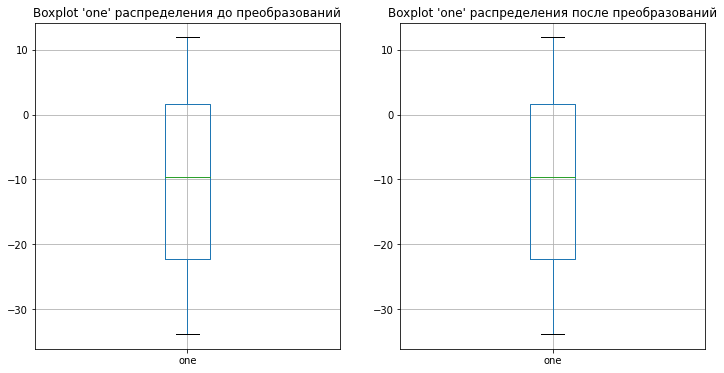

In [14]:
one = delete(df, 'one');

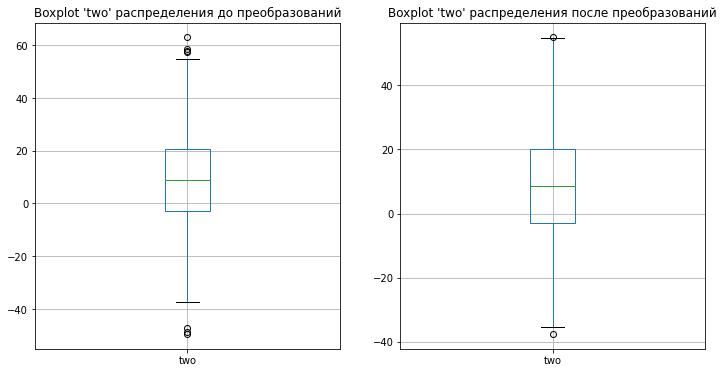

In [15]:
two = delete(df, 'two');

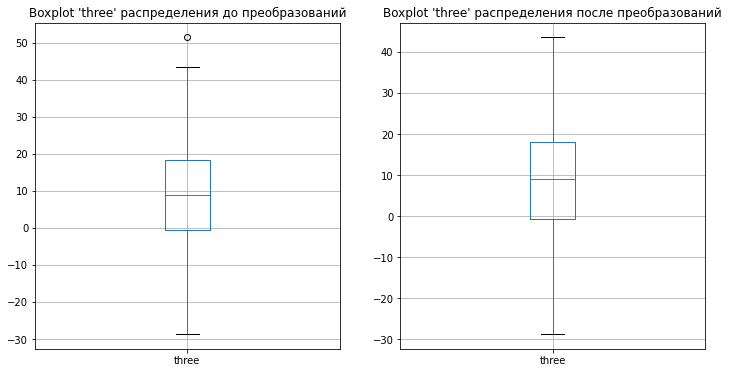

In [16]:
three = delete(df,'three');

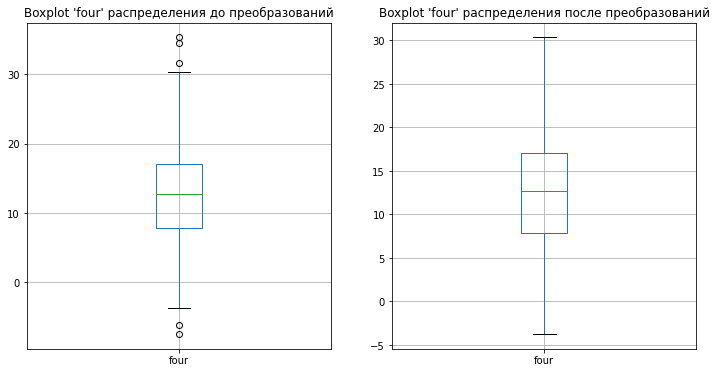

In [17]:
four = delete(df, 'four');

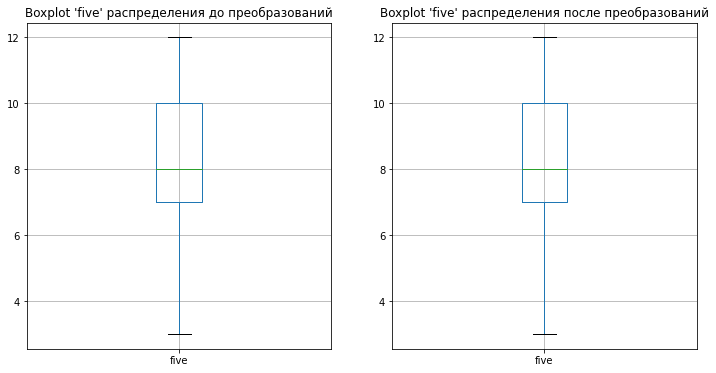

In [18]:
five = delete(df, 'five');

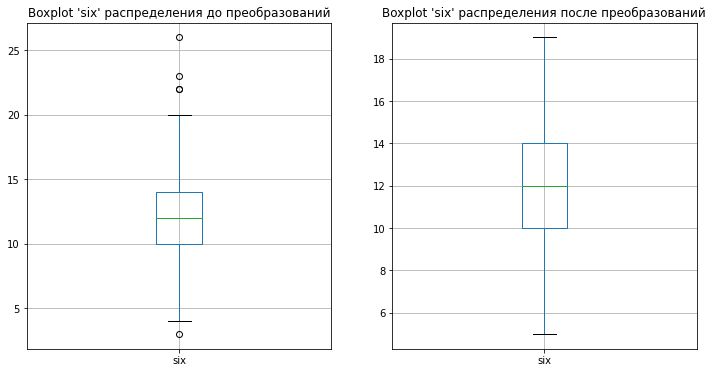

In [19]:
six = delete(df, 'six');

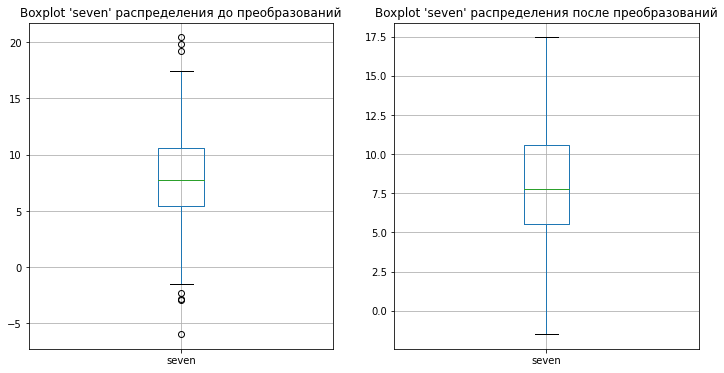

In [20]:
seven = delete(df, 'seven');

In [21]:
df = pd.DataFrame(data = [one,two,three,four,five,six,seven])
df = df.T

In [22]:
specifications = df.describe().loc[['mean','std','50%'],:]
scope_variation = df.max() - df.min()
for unique in specifications:
    # Посчитаем дисперсию
    specifications.loc['variance', unique] = df[unique].var()
    # Размах вариации
    specifications.loc['scope_variation', unique] = scope_variation[unique]
    # Коэффициент эксцесса
    specifications.loc['kurtosis', unique] =  scipy.stats.kurtosis(df[unique], fisher = True, nan_policy = 'omit')
    # Моду
    specifications.loc['mode', unique] =  df[unique].value_counts(ascending = False).head(1).index[0]
    # Коэффициент асимметрии
    specifications.loc['skewness', unique] = (specifications.loc['mean', unique] 
                                              - specifications.loc['mode', unique]) / specifications.loc['std', unique]

In [23]:
specifications

,one,two,three,four,five,six,seven
mean,-10.356208,8.754050,8.730183,12.576423,8.392000,11.977505,7.941892
std,13.584549,17.319358,13.287710,6.715063,1.627154,3.099032,3.599748
50%,-9.587024,8.657697,8.942202,12.740085,8.000000,12.000000,7.739566
variance,184.539975,299.960179,176.563245,45.092068,2.647631,9.604001,12.958185
scope_variation,45.765557,92.484697,72.128605,34.081331,9.000000,14.000000,18.924184
kurtosis,-1.246367,-0.143759,-0.334145,-0.316796,-0.343639,-0.440773,-0.349461
mode,-18.815943,-23.627036,8.427380,21.798782,9.000000,12.000000,8.038708
skewness,0.622747,1.869647,0.022788,-1.373384,-0.373658,-0.007259,-0.026895


### Проверить каждую выборку на принадлежность к закону распределения, о котором было сделано предположение в пункте 1, используя критерии хи-квадрат и Колмогорова - Смирнова

С помощью критерия хи-квадрат и критерия К-С проверим по-очереди каждую из выборок. Специально делаю это не через цикл, чтобы было удобнее читать. 

In [24]:
table_distributions = pd.DataFrame(columns=['Название закона распр.', 'Параметры закона распр', 'Критерий хи-кв. выбрана Н0?', 
                             'Критерий К.-С. выбрана Н0?'], index = ['one', 'two', 'three', 'four', 'five', 'six', 'seven'])
table_distributions['Название закона распр.'] = ['Равномерн','Норм','Норм','Норм','Норм','Норм','Норм']

In [25]:
def phi(number):
    stat, p = scipy.stats.normaltest(df[number], nan_policy = 'omit') # Критерий согласия Пирсона (хи-квадрат)
    print(f'Для {number} распределения:')
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))
    alpha = 0.05 
    if p > alpha:
        print('Принять гипотезу о нормальности')
        table_distributions.loc[number, 'Критерий хи-кв. выбрана Н0?'] = 1
    else:
        print('Отклонить гипотезу о нормальности')
        table_distributions.loc[number, 'Критерий хи-кв. выбрана Н0?'] = 0


In [26]:
def kolmogorov(number):
    col = df[number].reset_index(drop=True).dropna()
    mu  = 0
    sigma = 0
    for i in col:
        mu +=  i * (1/len(col))
        sigma +=  i**2 * (1/len(col))  
    sigma = sigma**0.5
    
    table_distributions.loc[number, 'Параметры закона распр'] = f'mu = {mu:2f}, sigma = {sigma:2f}'
    
    print(stats.kstest(col, 'norm', args = (mu,sigma)))
    if stats.kstest(col, 'norm', args = (mu,sigma))[1] > 0.01:
        table_distributions.loc[number, 'Критерий К.-С. выбрана Н0?'] = 1
    else: table_distributions.loc[number, 'Критерий К.-С. выбрана Н0?'] = 0

Для первого случая рассмотрим отдельно

In [27]:
mu = (df['one'].max() + df['one'].min()) / 2
sigma = ((df['one'].max() - df['one'].min()) ** 2) / 12
sigma = sigma ** 0.5
table_distributions.loc['one', 'Параметры закона распр'] = f'mu = {mu:2f}, sigma = {sigma:2f}'
print(stats.kstest(df['one'], 'uniform', args = (mu,sigma)))
if stats.kstest(df['one'], 'uniform', args = (mu,sigma))[1] > 0.01:
    table_distributions.loc['one', 'Критерий К.-С. выбрана Н0?'] = 1
else: table_distributions.loc['one', 'Критерий К.-С. выбрана Н0?'] = 0

KstestResult(statistic=0.47419356664241286, pvalue=9.34621652821646e-104)


In [29]:
print(scipy.stats.chisquare(df['one']))
if scipy.stats.chisquare(df['one'])[1] > 0.01:
    table_distributions.loc['one', 'Критерий хи-кв. выбрана Н0?'] = 1
else: table_distributions.loc['one', 'Критерий хи-кв. выбрана Н0?'] = 0

Power_divergenceResult(statistic=-8891.8115119326, pvalue=1.0)


In [31]:
phi('two');
kolmogorov('two');

Для two распределения:
Statistics=0.329, p-value=0.848
Принять гипотезу о нормальности
KstestResult(statistic=0.037236787095442175, pvalue=0.4896527154168423)


In [32]:
phi('three');
kolmogorov('three');

Для three распределения:
Statistics=3.596, p-value=0.166
Принять гипотезу о нормальности
KstestResult(statistic=0.05127102074641596, pvalue=0.1401254525065566)


In [33]:
phi('four')
kolmogorov('four');

Для four распределения:
Statistics=3.337, p-value=0.188
Принять гипотезу о нормальности
KstestResult(statistic=0.18156888091835674, pvalue=9.427074628877473e-15)


In [34]:
phi('five')
kolmogorov('five');

Для five распределения:
Statistics=6.101, p-value=0.047
Отклонить гипотезу о нормальности
KstestResult(statistic=0.3681445222604265, pvalue=2.777284864771602e-61)


In [35]:
phi('six')
kolmogorov('six');

Для six распределения:
Statistics=8.097, p-value=0.017
Отклонить гипотезу о нормальности
KstestResult(statistic=0.31508400446371565, pvalue=1.193212807260948e-43)


In [36]:
phi('seven');
kolmogorov('seven');

Для seven распределения:
Statistics=3.467, p-value=0.177
Принять гипотезу о нормальности
KstestResult(statistic=0.20061952082398632, pvalue=7.207172251681115e-18)


### Посмотрим на общую таблицу:
1 - выбрана Н0, <br>
0 - отклонена H0

In [38]:
table_distributions

,Название закона распр.,Параметры закона распр,Критерий хи-кв. выбрана Н0?,Критерий К.-С. выбрана Н0?
one,Равномерн,"mu = -10.988067, sigma = 13.211378",1,0
two,Норм,"mu = 8.754050, sigma = 19.390336",1,1
three,Норм,"mu = 8.730183, sigma = 15.887904",1,1
four,Норм,"mu = 12.576423, sigma = 14.253680",1,0
five,Норм,"mu = 8.392000, sigma = 8.547982",0,0
six,Норм,"mu = 11.977505, sigma = 12.371135",0,0
seven,Норм,"mu = 7.941892, sigma = 8.718116",1,0


Нормально распределёнными оказались 2-е и 3-е распределения

### Провести проверку: можно ли в качестве оценки математического ожидания использовать округленное до целого среднее значение? 

In [41]:
two = df['two'].reset_index(drop=True).dropna()
mu  = round(two.mean())
sigma = 19.445625
print('p-value =',stats.kstest(two, 'norm', args = (mu,sigma))[1])

p-value = 0.49255406515335987


In [42]:
three = df['three'].reset_index(drop=True).dropna()
mu  = round(three.mean())
sigma = 16.046877
print('p-value =',stats.kstest(three, 'norm', args = (mu,sigma))[1])

p-value = 0.0678758721328715


p-value остался выше уровня значимости, а значит в качестве оценки мат. ожидания **можно** использовать округленное до целого среднее значение

### Для нормально распределенных случайных величин проверить: µ1=µ2; D1=D2
D - дисперсия

In [43]:
table_distributions['two':'seven']

,Название закона распр.,Параметры закона распр,Критерий хи-кв. выбрана Н0?,Критерий К.-С. выбрана Н0?
two,Норм,"mu = 8.754050, sigma = 19.390336",1,1
three,Норм,"mu = 8.730183, sigma = 15.887904",1,1
four,Норм,"mu = 12.576423, sigma = 14.253680",1,0
five,Норм,"mu = 8.392000, sigma = 8.547982",0,0
six,Норм,"mu = 11.977505, sigma = 12.371135",0,0
seven,Норм,"mu = 7.941892, sigma = 8.718116",1,0


In [44]:
table_uniformity = pd.DataFrame(columns=['N ст1', 'N ст2', 'мю1=мю2', 'D1=D2',
                                         'Критерий К.-С. Выбрана Н0?', 'Ранговый кр. Выбрана Н0?'])

In [45]:
numbers = [two,three, four, five, six, seven]
n = 0
n1 = 0
n2 = 0
# Критерий Флигнера-Килина о равенстве дисперсий:
for i in numbers:
    for k in numbers:
        if i.name != k.name and n1 < n2:
            res = stats.fligner(i,k)
            print(f'p-value для {i.name} и {k.name} = {res[1]}')
            if res[1] > 0.01:
                table_uniformity.loc[n,'D1=D2'] = 1
            else :
                table_uniformity.loc[n,'D1=D2'] = 0
            n += 1
        n2 += 1
    n1 += 1
    n2 = 0

p-value для two и three = 3.587957134861565e-07
p-value для two и four = 9.44534481841349e-50
p-value для two и five = 1.7421582562950974e-114
p-value для two и six = 1.2566887650272636e-91
p-value для two и seven = 6.542200415651643e-85
p-value для three и four = 1.1087355998378083e-35
p-value для three и five = 6.772938329482138e-107
p-value для three и six = 4.726191558024811e-83
p-value для three и seven = 3.898252074834016e-76
p-value для four и five = 2.934586898717713e-81
p-value для four и six = 7.873448599628404e-42
p-value для four и seven = 1.411152288797082e-30
p-value для five и six = 8.268459656632974e-30
p-value для five и seven = 1.7294941548047825e-39
p-value для six и seven = 0.00044739860961174824


In [46]:
table_uniformity

,N ст1,N ст2,мю1=мю2,D1=D2,Критерий К.-С. Выбрана Н0?,Ранговый кр. Выбрана Н0?
0,NaN,NaN,NaN,0,NaN,NaN
1,NaN,NaN,NaN,0,NaN,NaN
2,NaN,NaN,NaN,0,NaN,NaN
3,NaN,NaN,NaN,0,NaN,NaN
4,NaN,NaN,NaN,0,NaN,NaN
5,NaN,NaN,NaN,0,NaN,NaN
6,NaN,NaN,NaN,0,NaN,NaN
7,NaN,NaN,NaN,0,NaN,NaN
8,NaN,NaN,NaN,0,NaN,NaN
9,NaN,NaN,NaN,0,NaN,NaN


In [47]:
# Т критерий Стьюдента для выборок с неравными дисперсиями
from scipy.stats import ttest_ind
n = 0
n1 = 0
n2 = 0
for i in numbers:
    for k in numbers:
        if i.name != k.name and n1 < n2:
            ttest_ind(i, k, equal_var = False)

            if ttest_ind(i, k, equal_var = False)[1] > 0.01:
                table_uniformity.loc[n,'мю1=мю2'] = 1
            else :
                table_uniformity.loc[n,'мю1=мю2'] = 0
            n += 1
        n2 += 1
    n1 += 1
    n2 = 0


**Принимаем гипотезу о равенстве средних значений (т.к. в ttest_ind p-value > 0.05), а гипотезу о равенстве дисперсий отвергаем по аналогичным соображениям.**

### Проверить однородность тех же (п. 3) выборок, используя критерии
- Колмогорова-Смирнова,
- Мана-Уитни или Уилкоксона

In [48]:
one

0     -16.427992
1     -29.368694
2      -6.561724
3       7.358867
4       6.692038
         ...    
495   -14.625446
496    -8.260384
497   -26.231086
498     2.804773
499   -14.180425
Name: one, Length: 500, dtype: float64

In [49]:
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu

n = 0
n1 = 0
n2 = 0
for i in numbers:
    for k in numbers:
        if i.name != k.name and n1 < n2:
            ks_2samp(i,k)
            if ks_2samp(i, k)[1] > 0.01:
                table_uniformity.loc[n,'Критерий К.-С. Выбрана Н0?'] = 1
            else :
                table_uniformity.loc[n,'Критерий К.-С. Выбрана Н0?'] = 0
            n += 1
        n2 += 1
    n1 += 1
    n2 = 0

In [54]:
n = 0
n1 = 0
n2 = 0
for i in numbers:
    for k in numbers:
        if i.name != k.name and n1 < n2:
            mannwhitneyu(i,k)
            if mannwhitneyu(i, k)[1] > 0.01:
                table_uniformity.loc[n,'Ранговый кр. Выбрана Н0?'] = 1
            else :
                table_uniformity.loc[n,'Ранговый кр. Выбрана Н0?'] = 0
            table_uniformity.loc[n,'N ст1'] = i.name
            table_uniformity.loc[n,'N ст2'] = k.name
            n += 1
        n2 += 1
    n1 += 1
    n2 = 0


In [56]:
table_uniformity

,N ст1,N ст2,мю1=мю2,D1=D2,Критерий К.-С. Выбрана Н0?,Ранговый кр. Выбрана Н0?
0,two,three,1,0,1,1
1,two,four,0,0,0,0
2,two,five,1,0,0,1
3,two,six,0,0,0,0
4,two,seven,1,0,0,1
5,three,four,0,0,0,0
6,three,five,1,0,0,1
7,three,six,0,0,0,0
8,three,seven,1,0,0,1
9,four,five,0,0,0,0
